# Data Exploration

## Imports and Data Extraction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb
import xgboost as xgb

from sklearn.utils import resample

import notebook_utils as nu


import warnings
warnings.filterwarnings('ignore')

random_state = 42

In [2]:
data = pd.read_csv('./data/train.csv')

In [3]:
print(data.shape)

(200000, 202)


## 1) Basic Data Exploration

In [4]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [5]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## 2) Summarized Data Exploration using Pandas Profiling

In [6]:
from pandas_profiling import ProfileReport

In [ ]:
# Have to use minimal because local hardware does not support too much memory usage
pdProfile = ProfileReport(data, title="Data Exploration", minimal=True)
pdProfile.to_widgets()

Summarize dataset:   0%|          | 0/210 [00:00<?, ?it/s]

In [8]:
pdProfile.to_file("pdProfile.html")

### Observations on Pandas Profiling:

- ID_code is not relevant for the training phase;
- Most variables are seems to obbey a Normal Distribution;
- Target is nextremely unbalanced (20098 1s vs 179902 0s). Training this model may benefit from either undersampling or oversampling (Important: In the oversampling process, we have the risk of overfitting; in undersampling, we have the risk of loosing too much important data);
- There are no Missing Values (so missing value treatment is not necessary on this context);
- Means, Min, Max and Standard Deviations are very different between variables. It may benefit from Normalization;
- There are some variables whose Normal Distribution is bimodal. In other situations, it seems that we have two distributions one on top of another). They may benefit from some feature Engineering. TODO: Look for opportunities of Feature Engineering here.

## 3) Looking up Close

We will check out one or two of the variables more closely, for anything that might catch our attention.

### 3.1) Let us take a <i>deeper</i> look on how a "usual variable" looks like

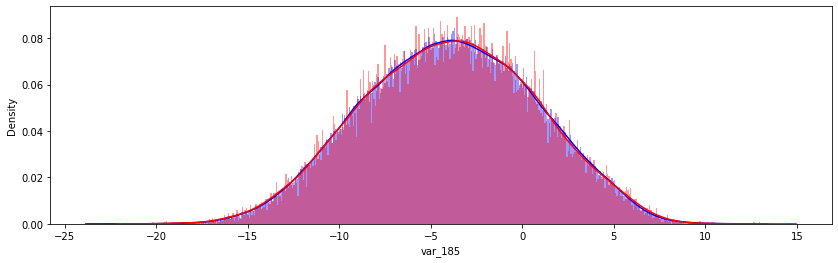

In [6]:
# Variable var_185
# Using ~ square root of the sample size as number of bins (good heuristic)
plt.figure(figsize=(14,4))
sns.distplot(data[data["target"] == 0]["var_185"],color="blue",kde=True,bins=448,label="0")
sns.distplot(data[data["target"] == 1]["var_185"],color="red",kde=True,bins=448,label="1")
plt.show()

### 3.1) Now we will take a look on a variable that has two modes

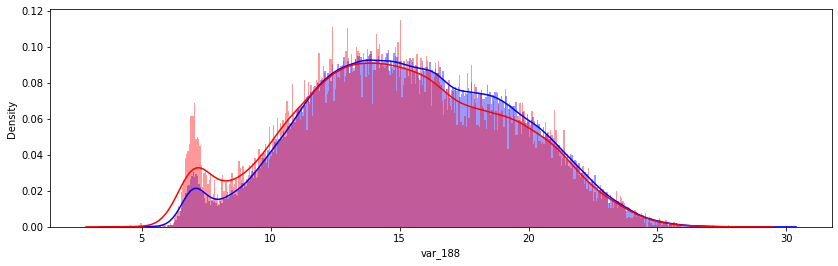

In [7]:
# Variable var_188
# Using ~ square root of the sample size as number of bins (good heuristic)
plt.figure(figsize=(14,4))
sns.distplot(data[data["target"] == 0]["var_188"],color="blue",kde=True,bins=448,label="0")
sns.distplot(data[data["target"] == 1]["var_188"],color="red",kde=True,bins=448,label="1")
plt.show()

### 3.2) Important to notice:
After trying to run a baseline Random Forest Classifier, it was observed that the data is too spiky. After some searching, got confirmation on another notebook that it is indeed a problem for most classifiers. The solution is: try to smooth the distribution of the data, so we can train it more effectively.

## 4) Let's search for correlations
Correlation between variables can damage the prediction of our model (since most tabular data classifiers do not perform well if two or more variables are correlated).

### 4.1) Generate Correlations

In [8]:
corr = data.corr()

### 4.2) Search for Considerable Correlation (either positive or negative)
We will be considering 0.3 a considerable correlation (and 0.7 a strong correlation).

In [9]:
pos_corr = np.where(corr > 0.3)
inv_corr = np.where(corr < (-0.3))
correlated = [(corr(x),corr(y)) for x,y in (zip(*pos_corr) or zip(*inv_corr)) if x!=y and x<y]
print(correlated)

[]


and .... it looks like there are no correlated variables!

## 4) Run Baseline Model
We will be running a Baseline Model to see, for example, which variables (out of the 200 variables) are the most promising and have a baseline performance (to set up expectations)

### 4.1) Define Training Set and Test Set

In [10]:
x_cols = [x for x in data.columns if (x not in ['ID_code', 'target'])]

X = data[x_cols]
y = data['target']

### 4.2) Train and Test Baseline Models

- RandomForestClassifier: the model scores high only on accuracy (probably due to most values being 0. Recall is very low, so the model is not learning properly. Another problem might be the amount of spikes in the different features.
- XGBoost
- LightGBM
* Using functions defined inside notebook_utils.py

#### Define Stratified KFolds

In [36]:
skfold = StratifiedKFold(n_splits=31, shuffle=True, random_state=random_state)

#### * Calculating Gini Score (since it is a scaled version of AUC score that makes random classifiers score 0 and perfect classifiers - from a precision and recall standpoint - score 1). GINI = 2*AUC. The AUC is the Area Under Curve of the ROC Curve

### 4.2.1) Random Forest Classifier

In [37]:
def eval_rfc(X, y, skf):
    all_scores = []
    for i_train, i_test in skf.split(X,y):
        model = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=10, random_state=random_state)
        model.fit(X.iloc[i_train], y.iloc[i_train])

        y_pred = model.predict(X.iloc[i_test])
        y_true = np.array(y.iloc[i_test])
        scores = nu.get_scores(y_true, y_pred)

        all_scores.append(scores)
    return all_scores

In [38]:
df_result_rfc = pd.DataFrame(data = eval_rfc(X, y, skfold))
df_result_rfc.describe()

,accuracy,gini,f1,precision,recall
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.899530,0.000287,0.000596,0.145161,0.000299
std,0.000106,0.000730,0.001469,0.346255,0.000737
min,0.899395,-0.000172,0.000000,0.000000,0.000000
25%,0.899411,0.000000,0.000000,0.000000,0.000000
50%,0.899550,0.000000,0.000000,0.000000,0.000000
75%,0.899566,0.000000,0.000000,0.000000,0.000000
max,0.899860,0.003086,0.006154,1.000000,0.003086


### 4.2.2) XGBoost

In [39]:
def eval_xgb(X, y, skf):
    all_scores = []
    for i_train, i_test in skf.split(X,y):
        model = xgb.XGBClassifier(objective='binary:logistic', 
                                  n_jobs=-1, verbosity = 0, random_state=random_state)
        model.fit(X.iloc[i_train], y.iloc[i_train])

        y_pred = model.predict(X.iloc[i_test])
        y_true = np.array(y.iloc[i_test])
        scores = nu.get_scores(y_true, y_pred)
        
        all_scores.append(scores)
    return all_scores

In [40]:
df_result_xgb = pd.DataFrame(data = eval_xgb(X, y, skfold))
df_result_xgb.describe()

,accuracy,gini,f1,precision,recall
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.913820,0.238708,0.368861,0.698156,0.250821
std,0.002804,0.019657,0.024583,0.037240,0.018983
min,0.907626,0.196619,0.314943,0.619910,0.211094
25%,0.912353,0.226884,0.355137,0.676221,0.237654
50%,0.914135,0.238956,0.369690,0.699153,0.253086
75%,0.915214,0.251793,0.384800,0.722074,0.263683
max,0.920477,0.275507,0.417707,0.789700,0.283951


### 4.2.2) LightGBM

In [41]:
def eval_lgb(X, y, skf):
    all_scores = []
    for i_train, i_test in skf.split(X,y):
        model = lgb.LGBMClassifier(metric='auc',
                                   objective='binary', random_state=random_state)
        model.fit(X.iloc[i_train], y.iloc[i_train])

        y_pred = model.predict(X.iloc[i_test])
        y_true = np.array(y.iloc[i_test])
        scores = nu.get_scores(y_true, y_pred)

        all_scores.append(scores)
    return all_scores

In [42]:
df_result_lgb = pd.DataFrame(data = eval_lgb(X, y, skfold))
df_result_lgb.describe()

,accuracy,gini,f1,precision,recall
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.907690,0.093200,0.170724,0.876398,0.094684
std,0.001237,0.011674,0.019336,0.035377,0.011638
min,0.904666,0.065324,0.123386,0.761905,0.066358
25%,0.906998,0.086757,0.160112,0.860935,0.087963
50%,0.907781,0.093808,0.171983,0.887097,0.095532
75%,0.908400,0.099546,0.181314,0.895130,0.101002
max,0.909795,0.115380,0.206803,0.939394,0.117103


In [43]:
df_rfc_f1 = pd.DataFrame({"f1" : np.array(df_result_rfc["f1"])})
df_rfc_f1["model"] = "Random Forest Classifier"

df_xgb_f1 = pd.DataFrame({"f1" : np.array(df_result_xgb["f1"])})
df_xgb_f1["model"] = "XGBoost"

df_lgb_f1 = pd.DataFrame({"f1" : np.array(df_result_lgb["f1"])})
df_lgb_f1["model"] = "LightGBM"

df_results = pd.concat([df_rfc_f1, df_xgb_f1, df_lgb_f1])

<AxesSubplot:xlabel='model', ylabel='f1'>

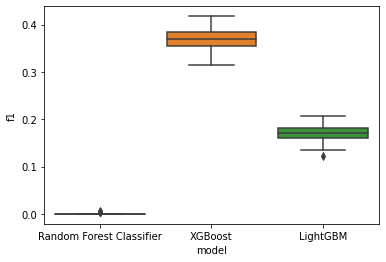

In [44]:
sns.boxplot(x='model', y='f1', data=df_results)

## 5) Oversampling and Undersampling

Since Stratified KFold seems to do some kind of oversampling, we will focus on the undersampling

### 5.1) Undersampling

In [45]:
df_0 = data[data["target"] == 0]
df_1 = data[data["target"] == 1]

data_under_0 = df_0.sample(df_1.shape[0])

data_under = pd.concat([data_under_0, df_1])

data_under.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,...,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000,40196.000000
mean,0.500000,10.893582,-1.360920,10.917202,6.816656,11.109706,-4.785733,5.483513,16.527943,0.382896,...,3.580850,7.621267,1.846449,3.252678,17.907966,-0.091603,2.464176,8.866016,15.640605,-2.998560
std,0.500006,3.151724,4.130094,2.746010,2.056394,1.632324,8.005038,0.896805,3.420788,3.321539,...,4.684225,3.123036,1.485892,4.034739,3.168131,1.452778,5.511933,0.936966,3.115282,10.465273
min,0.000000,0.452800,-14.037000,2.946200,-0.040200,5.831600,-29.777300,2.495700,6.465300,-9.839100,...,-14.093300,-2.343000,-3.442800,-11.783400,9.515000,-5.018500,-14.020400,6.119000,6.299300,-38.852800
25%,0.000000,8.559900,-4.538825,8.830975,5.263800,9.902375,-11.007700,4.813800,13.896225,-2.193075,...,0.169775,5.266775,0.794925,0.497525,15.526300,-1.138225,-1.784950,8.214475,13.563925,-10.830675
50%,0.500000,10.726250,-1.317050,10.790050,6.839450,11.138350,-4.578750,5.474750,16.439950,0.485150,...,3.558200,7.528700,1.801700,3.316300,17.870050,-0.130950,2.585750,8.848600,15.688750,-2.522000
75%,1.000000,13.016150,1.616750,12.753200,8.339050,12.297500,1.208350,6.097825,19.069900,2.998725,...,6.844025,9.709900,2.868500,6.165750,20.321275,0.897425,6.726125,9.559700,17.922575,5.269850
max,1.000000,19.472500,9.029800,18.344700,13.188300,16.671400,16.907300,8.447700,27.039800,9.519400,...,18.078900,16.520500,7.647600,17.317100,27.295300,4.088100,17.684100,11.851100,25.857100,24.630900


In [46]:
x_cols = [x for x in data_under.columns if (x not in ['ID_code', 'target'])]
X_under = data_under[x_cols]
y_under = data_under['target']

In [47]:
skfold_under = StratifiedKFold(n_splits=7, shuffle=True, random_state=random_state)

#### 5.1.1) Running Models 

In [48]:
df_result_rfc = pd.DataFrame(eval_rfc(X_under, y_under, skfold))
df_result_xgb = pd.DataFrame(eval_xgb(X_under, y_under, skfold))
df_result_lgb = pd.DataFrame(eval_lgb(X_under, y_under, skfold))

#### 5.1.2) Result

In [49]:
df_rfc_f1 = pd.DataFrame({"f1" : np.array(df_result_rfc["f1"])})
df_rfc_f1["model"] = "Random Forest Classifier"

df_xgb_f1 = pd.DataFrame({"f1" : np.array(df_result_xgb["f1"])})
df_xgb_f1["model"] = "XGBoost"

df_lgb_f1 = pd.DataFrame({"f1" : np.array(df_result_lgb["f1"])})
df_lgb_f1["model"] = "LightGBM"

df_results_under = pd.concat([df_rfc_f1, df_xgb_f1, df_lgb_f1])

<AxesSubplot:xlabel='model', ylabel='f1'>

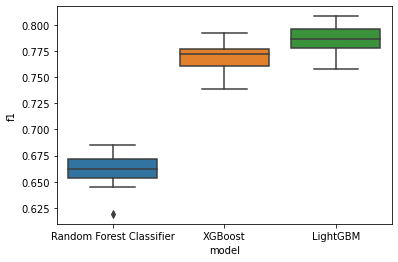

In [50]:
sns.boxplot(x='model', y='f1', data=df_results_under)

In [ ]:
df_results_under[df_results_under["model"] == "XGBoost"].describe()

#### 5.1.3) Discussion
We can see that by making the amount of target 0's and 1's, the f1 score gets a lot better.

### 5.2) Oversampling

In [51]:
nr_df_0 = data[data["target"] == 0].shape[0]
df1 = data[data["target"] == 1]

n_samples = nr_df_0
df_over_1 = resample(df1, replace=True, n_samples=n_samples,random_state=random_state)
data_over = pd.concat([df_0, df_over_1])

data_over.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,...,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000
mean,0.500000,10.889919,-1.350019,10.906273,6.826425,11.100942,-4.738003,5.487109,16.540432,0.375221,...,3.577263,7.628359,1.843876,3.241889,17.890943,-0.087307,2.472684,8.864379,15.661679,-2.996854
std,0.500001,3.155617,4.137721,2.740529,2.058242,1.635069,7.996846,0.897177,3.422709,3.333777,...,4.691083,3.116746,1.483165,4.026553,3.165791,1.455639,5.509567,0.937325,3.127651,10.442188
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.556200,-4.518250,8.818400,5.281700,9.893500,-10.953100,4.817200,13.921975,-2.214300,...,0.163475,5.266300,0.792175,0.480800,15.528400,-1.140600,-1.780400,8.210700,13.575000,-10.814000
50%,0.500000,10.717000,-1.316700,10.779800,6.860050,11.126000,-4.475200,5.476300,16.447400,0.484700,...,3.557900,7.545100,1.797900,3.306700,17.849600,-0.119600,2.608500,8.848100,15.715000,-2.480800
75%,1.000000,13.013600,1.661700,12.737625,8.352525,12.292900,1.235900,6.100800,19.085300,3.022650,...,6.850800,9.727200,2.869300,6.163200,20.314900,0.897900,6.728925,9.562500,17.948000,5.198600
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [52]:
x_cols = [x for x in data_over.columns if (x not in ['ID_code', 'target'])]
X_over = data_over[x_cols]
y_over = data_over['target']

#### 5.2.1) Running Models 

In [53]:
df_result_rfc = pd.DataFrame(eval_rfc(X_over, y_over, skfold))
df_result_xgb = pd.DataFrame(eval_xgb(X_over, y_over, skfold))
df_result_lgb = pd.DataFrame(eval_lgb(X_over, y_over, skfold))

#### 5.2.2) Result

In [54]:
df_rfc_f1 = pd.DataFrame({"f1" : np.array(df_result_rfc["f1"])})
df_rfc_f1["model"] = "Random Forest Classifier"

df_xgb_f1 = pd.DataFrame({"f1" : np.array(df_result_xgb["f1"])})
df_xgb_f1["model"] = "XGBoost"

df_lgb_f1 = pd.DataFrame({"f1" : np.array(df_result_lgb["f1"])})
df_lgb_f1["model"] = "LightGBM"

df_results_over = pd.concat([df_rfc_f1, df_xgb_f1, df_lgb_f1])

<AxesSubplot:xlabel='model', ylabel='f1'>

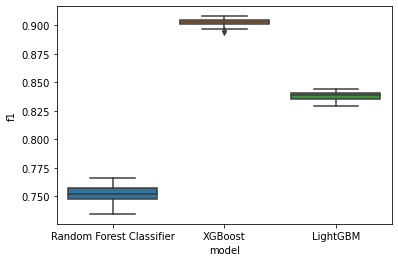

In [55]:
sns.boxplot(x='model', y='f1', data=df_results_over)

In [65]:
df_results_over[df_results_over["model"] == "XGBoost"].describe()

,f1
count,31.000000
mean,0.902442
std,0.003022
min,0.894764
25%,0.900644
50%,0.902891
75%,0.904181
max,0.907777


#### 5.2.3) Discussion
- We can see that by making the amount of target 0's and 1's, the f1 score gets a lot better.
- We can see that by oversampling the data we reach a better score than by undersampling.

## 6) Visualizing the Best Features
We will search for the features that carry most weight and evaluate if getting rid of the less useful ones we can improve our model's performance. We can observe that LightGBM and XGBoost are the ones with the best performance, so we will focus on these two.

### 6.1) LightGBM

In [66]:
lgb_over = lgb.LGBMClassifier(metric='auc',
                              objective='binary', random_state=random_state)
lgb_over.fit(X_over, y_over)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='auc', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=42, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

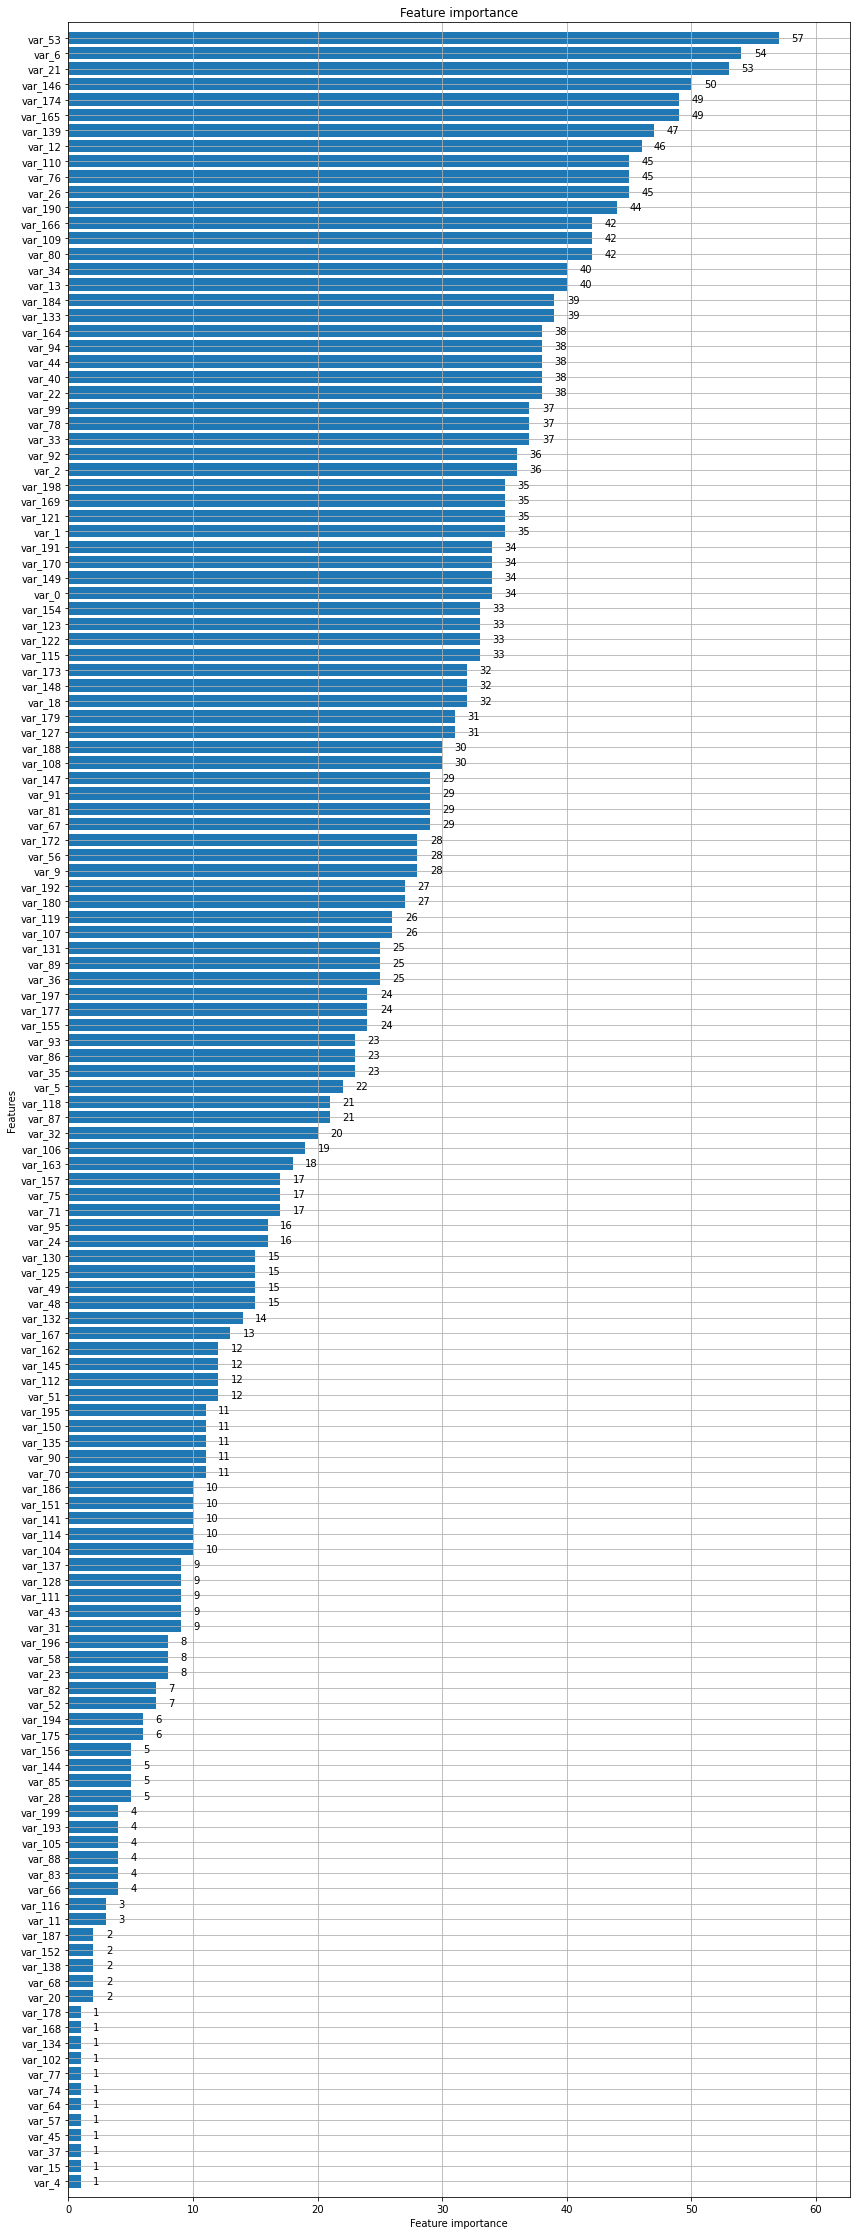

In [75]:
fig, ax = plt.subplots(figsize=(14,40))
lgb.plot_importance(lgb_over, max_num_features=200, height=0.8, ax=ax)
plt.show()

### 6.2) XGBoost

In [71]:
xgb_over = xgb.XGBClassifier(objective='binary:logistic', 
                          n_jobs=-1, verbosity = 0, random_state=random_state)
xgb_over.fit(X_over, y_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=0)

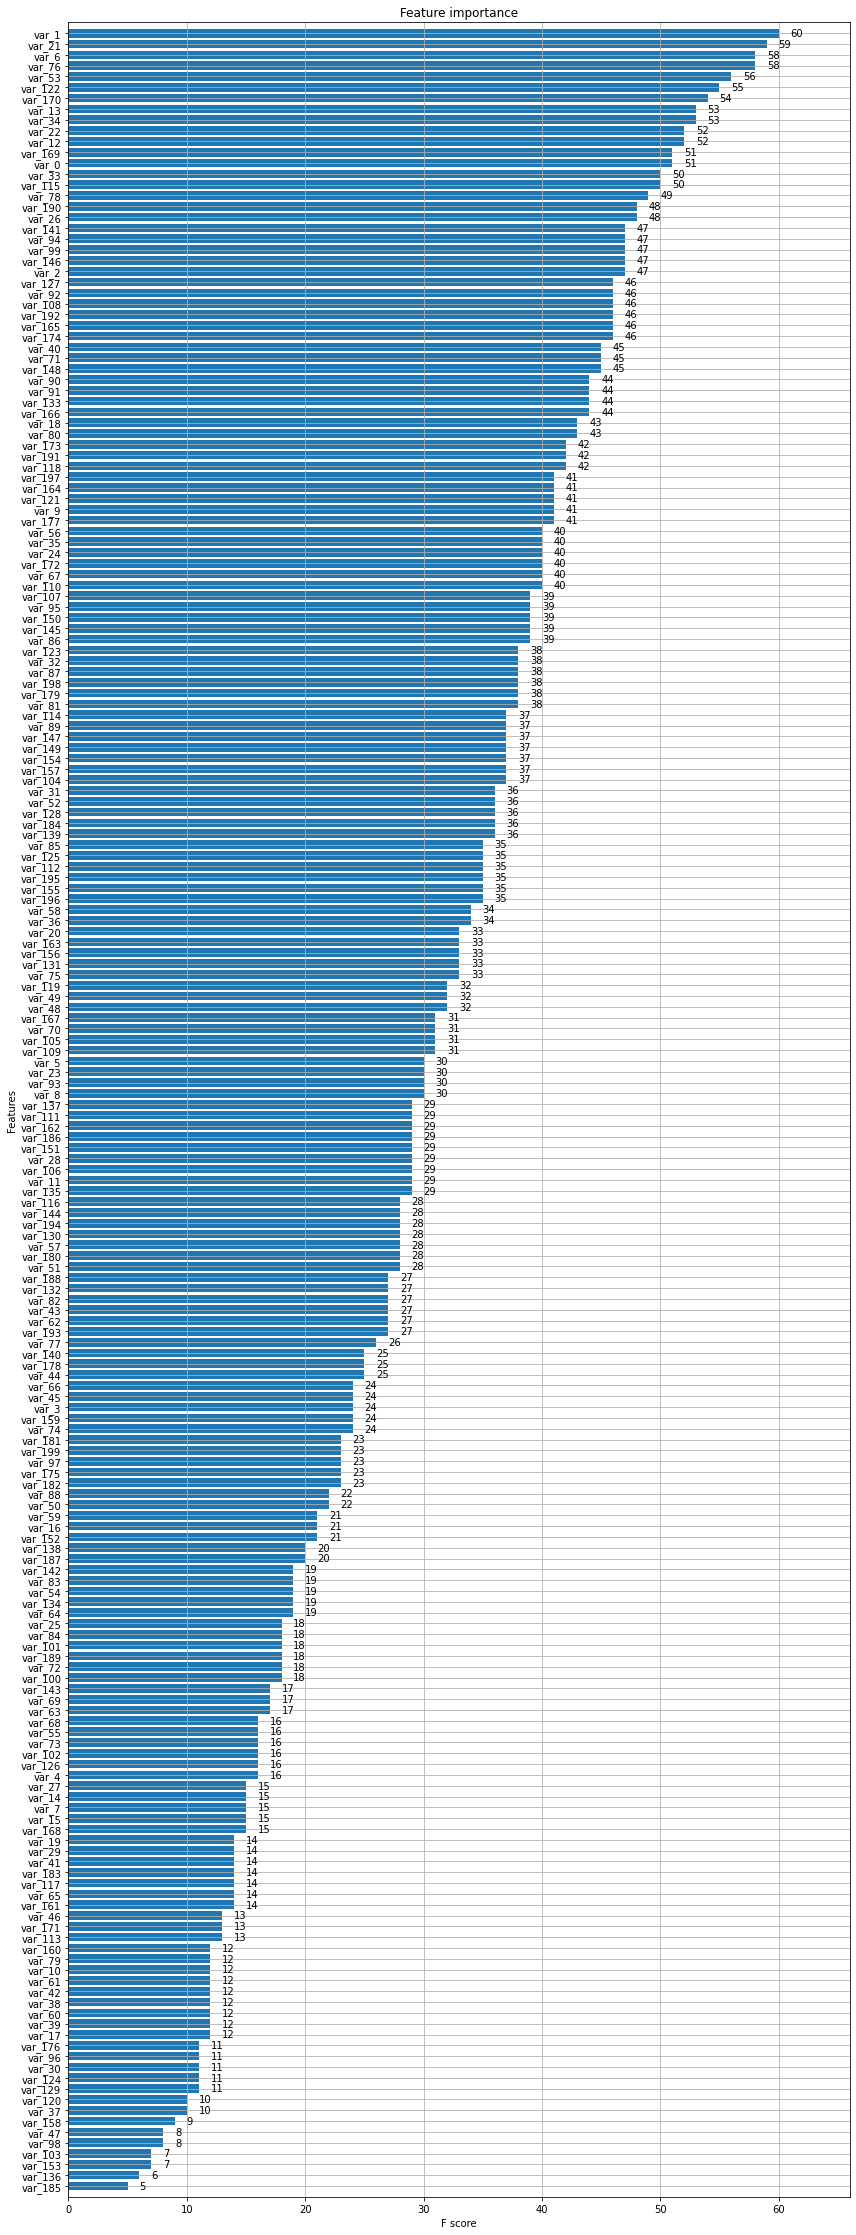

In [76]:
fig, ax = plt.subplots(figsize=(14,40))
xgb.plot_importance(xgb_over, max_num_features=200, height=0.8, ax=ax)
plt.show()

### 6.3) Let's check if the model improved after removing the less significative features
TODO

In [ ]:
lgb_features_ordered = np.argsort(xgb_over.feature_importances_)[::-1]
for i in lgb_features_ordered:
    print([data.columns[i], lgb_over.feature_importances_[index]]) 
    
xgb_features_ordered = np.argsort(lgb_over.feature_importances_)[::-1]
for i in xgb_features_ordered:
    print([data.columns[i], xgb_over.feature_importances_[index]]) 

In [ ]:
x_cols = [x for x in lgb_over if (x not in ['ID_code', 'target'])]

data_new = data[]

In [ ]:
df_xgb_f1 = pd.DataFrame({"f1" : np.array(df_result_xgb["f1"])})
df_xgb_f1["model"] = "XGBoost"

df_lgb_f1 = pd.DataFrame({"f1" : np.array(df_result_lgb["f1"])})
df_lgb_f1["model"] = "LightGBM"

df_results_less_features = pd.concat([df_xgb_f1, df_lgb_f1])

In [ ]:
sns.boxplot(x='model', y='f1', data=df_results_less_features)

In [ ]:
df_results_less_features.describe()

## 7) Smoothing the Spikes
NEXT STEP